# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# 데이터 불러오기
train=pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\ESAA YB 미니프로젝트(1)\영화 관객수\movies_train.csv")
test=pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\ESAA YB 미니프로젝트(1)\영화 관객수\movies_test.csv")
submission=pd.read_csv(r"C:\Users\jk102\OneDrive - 이화여자대학교\바탕 화면\이화여자대학교\ESAA\ESAA YB 미니프로젝트(1)\영화 관객수\submission.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [14]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [9]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
# pd.options.display.float_format = '{:.1f}'.format

In [19]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [17]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train 데이터의 dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778


In [21]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train 데이터의 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [46]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [47]:
train['release_time']=pd.to_datetime(train['release_time'])

## 5) 데이터 시각화 및 분석

### 5-1) 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수(dir_prev_bfnum: float64) 에 따른 관객 수(box_off_num:int64) 

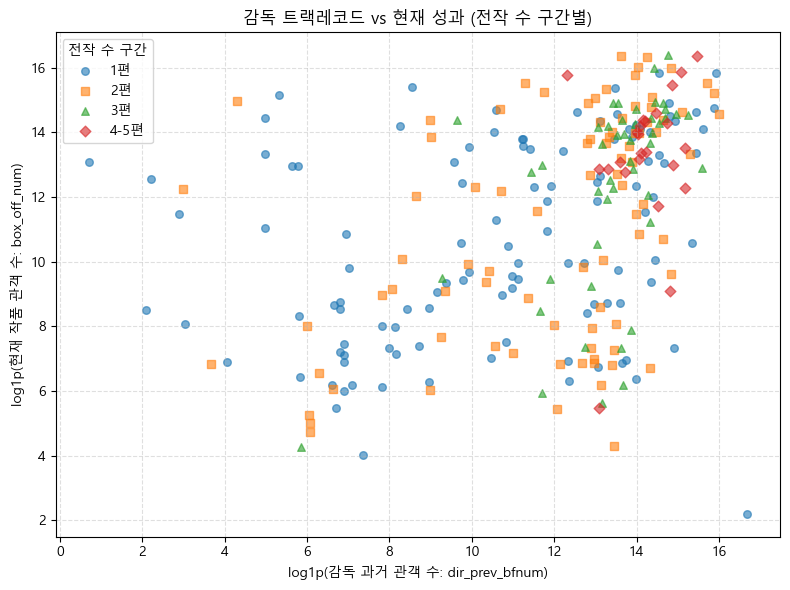

상관계수 (log_prev vs log_aud): 0.448
prev_bins
1편      113
2편       86
3편       47
4-5편     24
Name: count, dtype: int64


In [ ]:
# 감독의 과거 성과 vs 현재 흥행 (scatter)
# x: log1p(dir_prev_bfnum), y: log1p(box_off_num)
# 색/마커: dir_prev_num(전작 수) 구간

# 로그 변환 (0 처리 안전)
train["log_prev"] = np.log1p(train["dir_prev_bfnum"])
train["log_aud"]  = np.log1p(train["box_off_num"])

# 전작 수 구간화
bins   = [1, 2, 3, 4, np.inf]                 # 1편, 2편, 3편, 4-5편
labels = ["1편","2편","3편","4-5편"]    # 라벨
train["prev_bins"] = pd.cut(train["dir_prev_num"], bins=bins, labels=labels, right=False)

# ===== 3) 산점도 =====
plt.figure(figsize=(8, 6))
markers = ["o", "s", "^", "D"]  # 구간별 마커
for i, (lab, grp) in enumerate(train.groupby("prev_bins")):
    m = markers[i % len(markers)]
    plt.scatter(grp["log_prev"], grp["log_aud"], alpha=0.6, s=30, marker=m, label=str(lab))

plt.xlabel("log1p(감독 과거 관객 수: dir_prev_bfnum)")
plt.ylabel("log1p(현재 작품 관객 수: box_off_num)")
plt.title("감독 트랙레코드 vs 현재 성과 (전작 수 구간별)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="전작 수 구간")
plt.tight_layout()
plt.show()

# ===== 5) (선택) 간단한 수치 요약 =====
corr = train[["log_prev", "log_aud"]].corr().iloc[0,1]
print(f"상관계수 (log_prev vs log_aud): {corr:.3f}")
print(train["prev_bins"].value_counts().sort_index())

* 1→2로 갈수록 성과가 올라가고, 3편 구간에서 피크가 나타나며, 4–5편은 3편보다는 약간 낮지만 2편보다는 높다

### 5-2) 개봉 월 시즌성 × 장르

    genre  month  median_log_aud   n
0      공포      1             7.4   1
1      공포      2             7.6   2
2      공포      3            12.4   3
3      공포      4             9.4   1
4      공포      5            14.2   2
5      공포      6            12.4   4
6      공포      7            13.3   6
7      공포      8            11.6  10
8      공포      9            10.7   4
9      공포     10            13.9   5
10     공포     11            13.5   3
11     공포     12             6.3   1
12  다큐멘터리      1             8.1   6
13  다큐멘터리      2             7.9   4
14  다큐멘터리      3             9.0   6
15  다큐멘터리      4             7.8  12
16  다큐멘터리      5             8.5   9
17  다큐멘터리      6             7.2   5
18  다큐멘터리      7             8.0   7
19  다큐멘터리      8             9.3   7


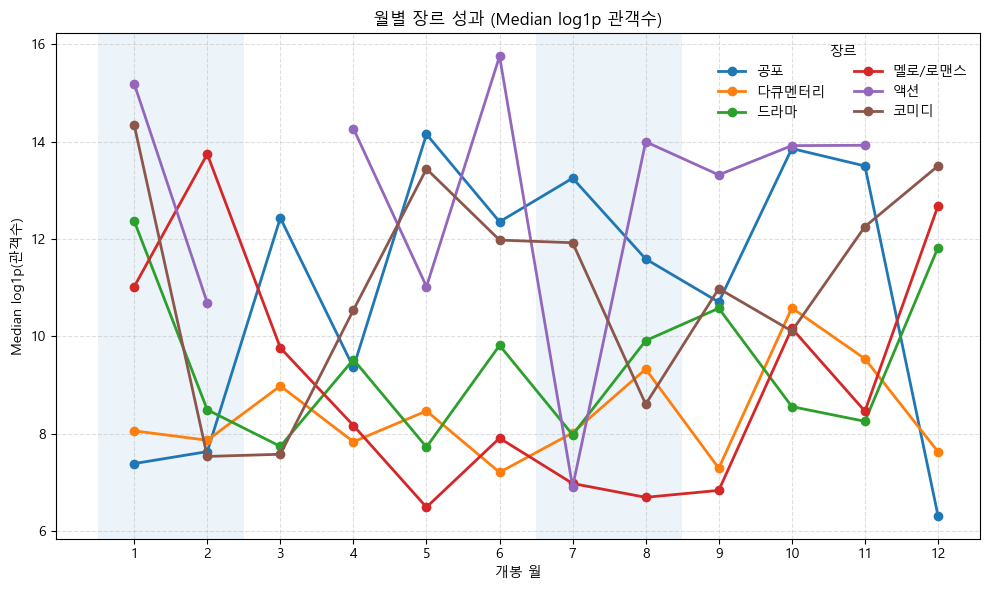

In [64]:
# 월별 장르 성과 라인플롯: "장르는 계절을 탈까?"
# - x: 개봉 월(1~12)
# - y: 장르별 median log1p(관객수)  → 극단치 영향 완화
# - 상위 K개 장르만 시각화(혼잡도 ↓)
# - 방학/명절(1–2월, 7–8월) 배경 밴드 옵션

# -------------------------------
# 0) 전처리
# -------------------------------

# 파생: 개봉 월, 로그 관객수
train["month"]   = train["release_time"].dt.month
train["log_aud"] = np.log1p(train["box_off_num"].astype(float))

# -------------------------------
# 1) 상위 K개 장르만 선택(혼잡도 줄이기)
# -------------------------------
TOP_K = 6
top_genres = train["genre"].value_counts().head(TOP_K).index
sub = train[train["genre"].isin(top_genres)].copy()

# -------------------------------
# 2) 월×장르 집계(중앙값 + 표본수)
# -------------------------------
agg_median = (
    sub.groupby(["genre", "month"])["log_aud"]
      .median()
      .rename("median_log_aud")
      .reset_index()
)
agg_count = (
    sub.groupby(["genre", "month"])["box_off_num"]
      .size()
      .rename("n")
      .reset_index()
)
summary = pd.merge(agg_median, agg_count, on=["genre", "month"], how="left")

# 표 확인
print(summary.sort_values(["genre", "month"]).head(20))

# -------------------------------
# 3) 라인플롯
# -------------------------------
plt.figure(figsize=(10, 6))
months = list(range(1, 13))

for gname, grp in summary.groupby("genre"):
    # 월 1~12 전체를 보이도록 재색인
    y = pd.Series(index=months, dtype=float)
    y.loc[grp["month"].values] = grp["median_log_aud"].values
    plt.plot(months, y.values, marker="o", linewidth=2, label=str(gname))

# 축/격자/범례
plt.xticks(months)
plt.xlabel("개봉 월")
plt.ylabel("Median log1p(관객수)")
plt.title("월별 장르 성과 (Median log1p 관객수)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="장르", ncol=2, frameon=False)

# -------------------------------
# 4) 방학·명절 배경 밴드 강조
# -------------------------------
ax = plt.gca()
# 겨울방학+설 근접: 1~2월
ax.axvspan(0.5, 2.5, alpha=0.08)
# 여름방학: 7~8월
ax.axvspan(6.5, 8.5, alpha=0.08)

plt.tight_layout()


** 이번 데이터 기준으로 전반적 시즌성은 연초(1월)와 가을(10월)이 강세다. 장르별로는 드라마·코미디가 1월에 뚜렷한 피크, 다큐멘터리는 10월에 강세가 관찰된다. 멜로는 2월 잠정 강세가 보이지만 표본이 적어 확인이 필요하며, 공포/느와르는 여름 전후 가능성이 있으나 표본 주의가 필요하다.
* 월별 전형적 관객수(중앙값) 상위: 1월(≈ 28만) ≫ 10월(≈ 5.0만) > 8–9월(≈ 2.1만) > 12월(≈ 2.2만)

* 하위: 2–5월(≈ 3.8천~8천), 7월(≈ 7.7천)
→ 연초(1월)·가을(10월) 창구가 전반적으로 유리.